### 모델 선택

### GridSearchCV

In [48]:
def select_model(X, Y):
    best_models = {}
    models = [
        {   'name': 'KNeighborsClassifier',
            'estimator': KNeighborsClassifier(),
        },
        {   'name': 'RandomForestClassifier',
            'estimator': RandomForestClassifier(),
        },
        {   'name': 'MLPClassifier',
            'estimator': MLPClassifier(),
        },
        {   'name': 'GradientBoostingClassifier',
            'estimator': GradientBoostingClassifier(),
        },
        {   'name': 'XGBClassifier',
            'estimator': XGBClassifier(),
        },
        {   'name': 'LGBMClassifier',
            'estimator': LGBMClassifier(),
        }
        
    ]
    
    for model in tqdm(models):
        start = time.perf_counter()
        grid = GridSearchCV(model['estimator'], param_grid={}, cv=5, scoring = "f1", verbose=False, n_jobs=-1)
        grid.fit(X, Y)
        best_models[model['name']] = {'score': grid.best_score_, 'params': grid.best_params_, 'model':model['estimator']}
        run = time.perf_counter() - start
        
    return best_models

models = select_model(X_train, y_train)
models

 17%|██████████████                                                                      | 1/6 [01:09<05:45, 69.12s/it]C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
 33%|████████████████████████████                                                        | 2/6 [01:15<03:21, 50.37s/it]C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [08:51<00:00, 88.64s/it]


{'KNeighborsClassifier': {'score': 0.24537987795697477,
  'params': {},
  'model': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                       metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                       weights='uniform')},
 'RandomForestClassifier': {'score': 0.35885065041535763,
  'params': {},
  'model': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                         max_depth=None, max_features='auto', max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, n_estimators='warn',
                         n_jobs=None, oob_score=False, random_state=None,
                         verbose=0, warm_start=False)},
 'MLPClassifier': {'score': 0.3434677910731614,
  'params': {},
  'model': MLPClassifier(activation='relu', alpha=0.0001, batch_siz

In [53]:
model1= XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1, colsample_bytree=1, gamma=0,
                learning_rate=0.1, max_delta_step=0, max_depth=3,
                min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
                nthread=None, objective='binary:logistic', random_state=0,
                reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                silent=None, subsample=1, verbosity=1)

model2 =LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                 importance_type='split', learning_rate=0.1, max_depth=-1,
                 min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                 n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                 random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
                 subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

model3 = GradientBoostingClassifier(criterion='friedman_mse', init=None,
                             learning_rate=0.1, loss='deviance', max_depth=3,
                             max_features=None, max_leaf_nodes=None,
                             min_impurity_decrease=0.0, min_impurity_split=None,
                             min_samples_leaf=1, min_samples_split=2,
                             min_weight_fraction_leaf=0.0, n_estimators=100,
                             n_iter_no_change=None, presort='auto',
                             random_state=None, subsample=1.0, tol=0.0001,
                             validation_fraction=0.1, verbose=0,
                             warm_start=False)

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

pred1=model1.predict(X_val)
pred2=model2.predict(X_val)
pred3=model3.predict(X_val)

In [57]:
f1_score(y_val,pred1)

0.48397291196388265

In [58]:
f1_score(y_val,pred2)

0.5074980268350434

In [59]:
f1_score(y_val,pred3)

0.5035609551738585

In [60]:
def plot_feature_importance(model, X_train, figsize=(12, 6)):
    sns.set_style('darkgrid')
    
    # Plot feature importance
    feature_importance = model.feature_importances_
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5

    plt.figure(figsize=figsize)
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X_train.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.show()

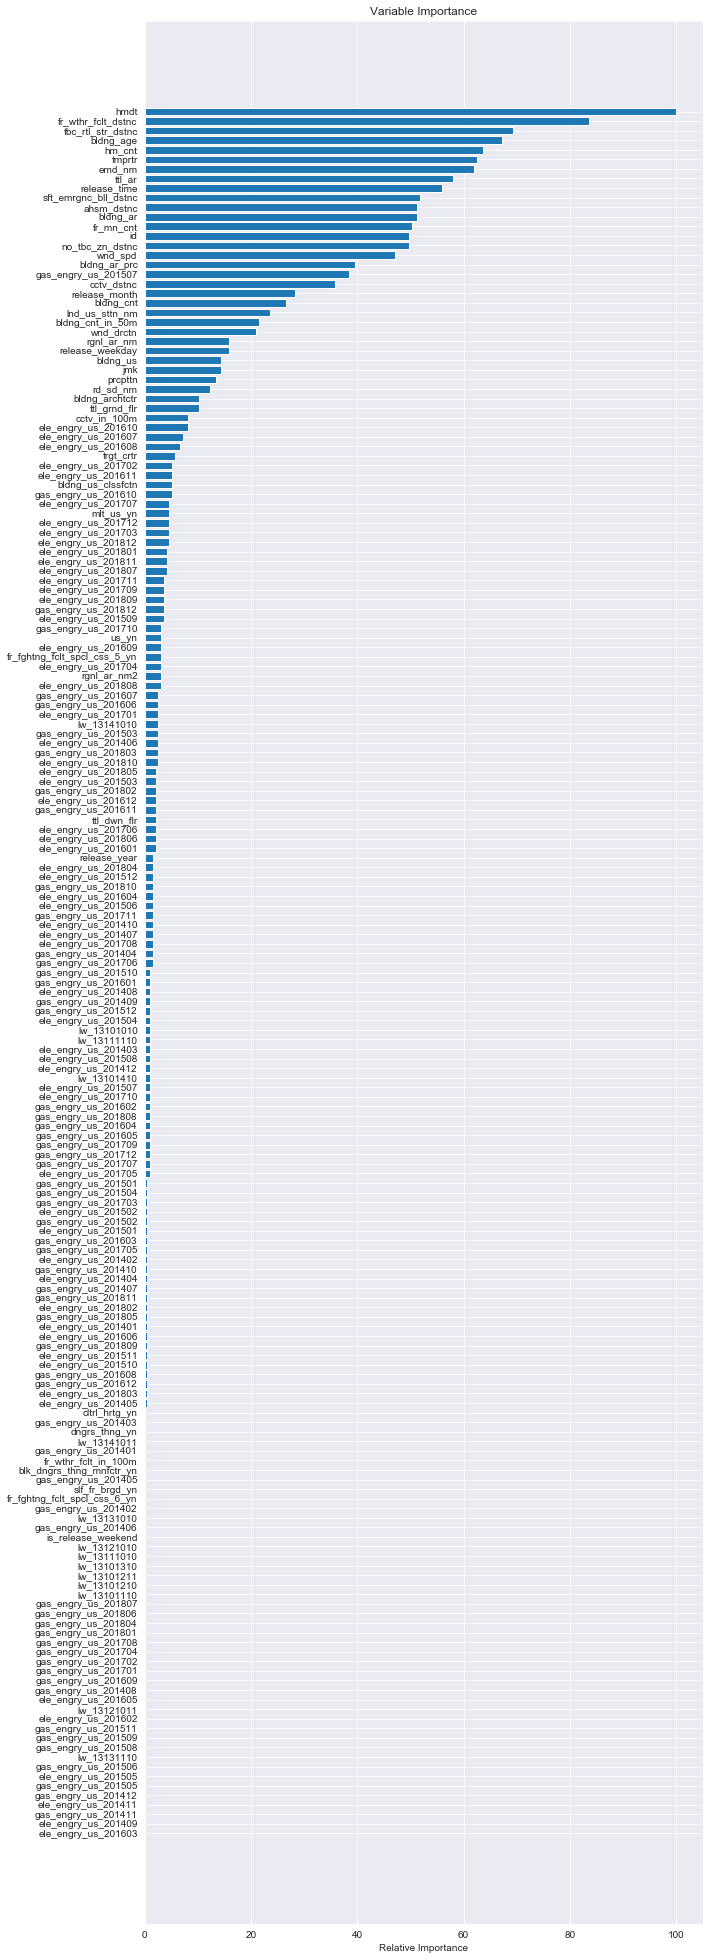

In [61]:
plot_feature_importance(model2, X_train, (10, 35))

### pipeline

In [66]:
from sklearn.pipeline import Pipeline

In [67]:
params = {'lgbm__learning_rate': [0.05, 0.1]}

In [68]:
pipe = Pipeline([('ss',StandardScaler()), ('lgbm', LGBMClassifier(n_estimators=1000))])

In [69]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ss',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lgbm',
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=1000,
                                n_jobs=-1, num_leaves=31, objective=None,
                                random_state=None, reg_alpha=0.0,
                                reg_lambda=0.0, silent=True, subsample=1.0,
                                subsample_for_bin=200000, subsample_freq=0))],
         verbose=False)

In [70]:
CV = GridSearchCV(pipe, params, scoring = 'f1', n_jobs= 1)
CV.fit(X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('ss',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('lgbm',
                                        LGBMClassifier(boosting_type='gbdt',
                                                       class_weight=None,
                                                       colsample_bytree=1.0,
                                                       importance_type='split',
                                                       learning_rate=0.1,
                                                       max_depth=-1,
                                                       min_child_samples=20,
                                                       min_child_we

In [71]:
y_pred0 = CV.predict(X_val)

In [72]:
f1_score(y_val,y_pred0)

0.48720975993703264